# Sentiment analysis with Logistic Regression

### Some plotting functions

In [51]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 370 (delta 68), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (370/370), 42.70 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/machine_learning_1/logistic_regression/machine_learning_1/logistic_regression/machine_learning_1/logistic_regression/machine_learning_1/logistic_regression


In [52]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [53]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

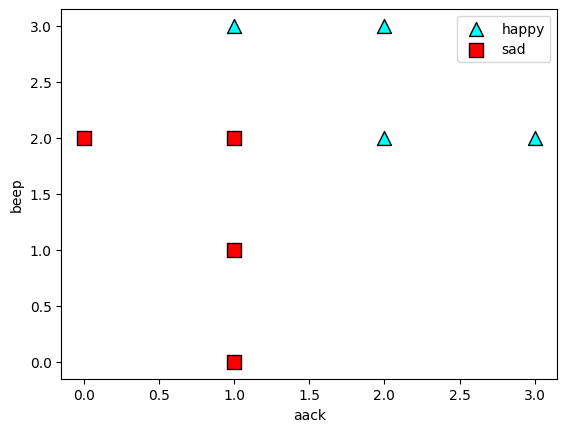

In [54]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [55]:
#steps
# 1- make model/prediction function
# 2-cost function
# 3- update woght formal
# 4-

def sigmoid(x):
    ## TODO ##
    # implement sigmoid function
    output=np.exp(x)/(1+np.exp(x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using sigmoid and score functions
    output=sigmoid(score(weights,bias,features))
    return output

def log_loss(weights, bias, features, label):
    ## TODO ##
    # implement log_loss calculation using prediction function
    pred=1.0*prediction(weights,bias,features)
    output=-label*np.log(pred) - (1-label)*np.log(1-pred)
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [60]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    pred=prediction(weights,bias,features)
    for i in range(len(weights)):
      weights[i]+=learning_rate*(label-pred)*features[i]
      bias+=learning_rate*(label-pred)
    return weights, bias

In [61]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

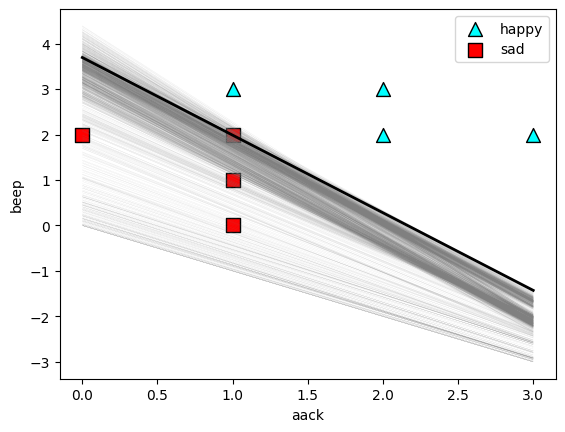

([1.0877573221401595, 0.6373809617288854], -2.3536078773124793)

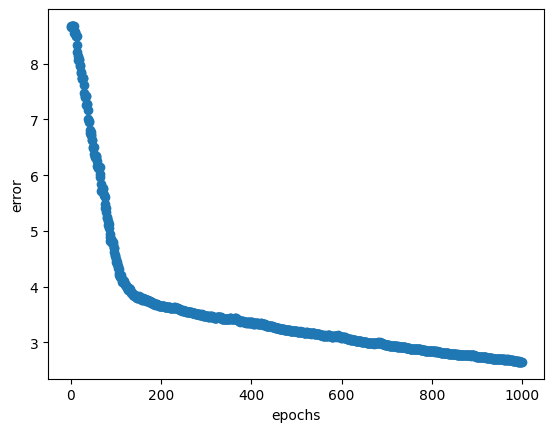

In [62]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [ ]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# use loss="log_loss",tol=None
clf=

In [ ]:
clf.score(features, labels)

In [ ]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()

### Real Example (Breast Cancer)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [ ]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

In [ ]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
# The `id` column can be dropped since each row is unique
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [ ]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

In [ ]:
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis');

In [ ]:
# use only "radius_mean" feature
from sklearn.linear_model import SGDClassifier


In [ ]:
# use all data
from sklearn.linear_model import SGDClassifier


In [ ]:
# use all data with standard scaler
# Fit the scaler on training data only
from sklearn.linear_model import SGDClassifier
